In [1]:
import numpy as np
import matplotlib.pyplot as plt


class Perceptron:
   def __init__(self, input_size, lr=0.1, epochs=10):
       self.weights = np.zeros(input_size)
       self.bias = 0
       self.lr = lr
       self.epochs = epochs
       self.errors = []


   def activation(self, x):
       return np.where(x>0, 1, 0)


   def predict(self, x):
       linear_output = np.dot(x, self.weights) + self.bias
       return self.activation(linear_output)


   def train(self, X, y):
       for epoch in range(self.epochs):
           total_error = 0
           for xi, target in zip(X, y):
               prediction = self.predict(xi)
               update = self.lr * (target - prediction)
               self.weights += update * xi
               self.bias += update
               total_error += int(update != 0.0)
           self.errors.append(total_error)
           print(f"Epoch {epoch+1}/{self.epochs}, Errors: {total_error}")


# NAND 게이트 데이터
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_nand = np.array([1, 1, 1, 0])


# 퍼셉트론 모델 훈련
ppn_nand = Perceptron(input_size=2)
ppn_nand.train(X_nand, y_nand)


# 예측 결과 확인
print("\nNAND Gate Test:")
for x in X_nand:
   print(f"Input: {x}, Predicted Output = {ppn_nand.predict(x)}")

Epoch 1/10, Errors: 2
Epoch 2/10, Errors: 3
Epoch 3/10, Errors: 3
Epoch 4/10, Errors: 0
Epoch 5/10, Errors: 0
Epoch 6/10, Errors: 0
Epoch 7/10, Errors: 0
Epoch 8/10, Errors: 0
Epoch 9/10, Errors: 0
Epoch 10/10, Errors: 0

NAND Gate Test:
Input: [0 0], Predicted Output = 1
Input: [0 1], Predicted Output = 1
Input: [1 0], Predicted Output = 1
Input: [1 1], Predicted Output = 0


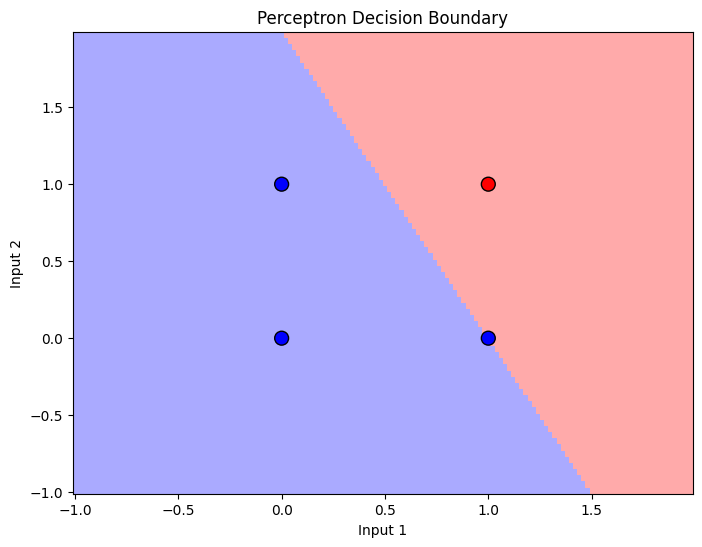

In [2]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(X, y, model):
   cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
   cmap_bold = ListedColormap(['#FF0000', '#0000FF'])


   h = .02
   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

   Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)

   plt.figure(figsize=(8, 6))
   plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


   plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=100, marker='o')
   plt.xlabel('Input 1')
   plt.ylabel('Input 2')
   plt.title('Perceptron Decision Boundary')
   plt.show()


plot_decision_boundary(X_nand, y_nand, ppn_nand)


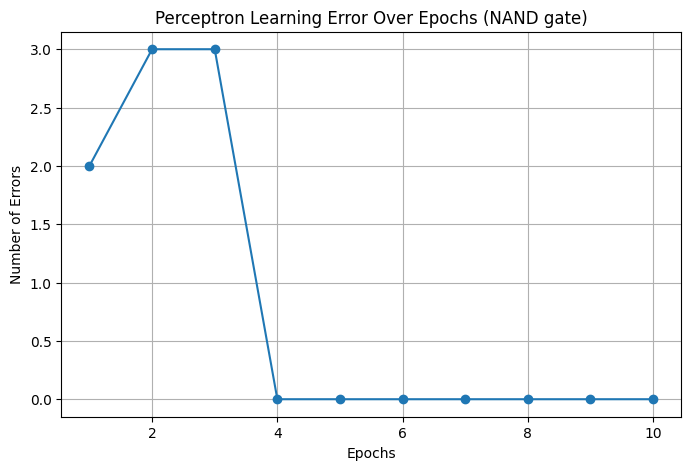

In [3]:
#오류 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ppn_nand.errors) + 1), ppn_nand.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Error Over Epochs (NAND gate)')
plt.grid(True)
plt.show()
